In [30]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import SGDRegressor, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [2]:
X, y = load_boston(return_X_y=True)

In [3]:
#kfold
kfold = KFold(n_splits=5, shuffle=True, random_state=19)
kfold.get_n_splits(X, y);

In [4]:
# standadization
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

#### Comparar os resultados dos seguintes algoritmos: Gradient Descent, Linear Regression, kNN, SVM.
#### Regressão

In [5]:
gd_rmse = []
gd_mae = []
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = SGDRegressor()
    clf.fit(X_train, y_train);
    y_pred_gd = clf.predict(X_test)
    rmse_gradiente = np.sqrt(metrics.mean_squared_error(y_test,y_pred_gd))
    mae_gradiente = metrics.mean_absolute_error(y_test, y_pred_gd)
    gd_rmse.append(rmse_gradiente)
    gd_mae.append(mae_gradiente)
    
print(np.mean(gd_rmse))
print(np.mean(gd_mae)) 

4.977691239035241
3.359634475577443


/home/igor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [6]:
# Linear Regression
lr_rmse = []
lr_mae = []
for train_index, test_index in kfold.split(X,y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr_model = LinearRegression()
    lr_model.fit(x_train, y_train)
    lr_y_pred = lr_model.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, lr_y_pred))
    mae = metrics.mean_absolute_error(y_test, lr_y_pred)
    lr_rmse.append(rmse)
    lr_mae.append(mae)
print(np.mean(lr_rmse))
print(np.mean(lr_mae))

4.8779464596715725
3.4235441630443724


In [7]:
# KNN
knn_rmse = []
knn_mae = []
for train_index, test_index in kfold.split(X, y):
    x_train,x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_pred_k = knn.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_k))
    mae = metrics.mean_absolute_error(y_test, y_pred_k)
    knn_rmse.append(rmse)
    knn_mae.append(mae)
print(np.mean(knn_rmse))
print(np.mean(knn_mae))    

4.690159538232974
2.996047369442827


In [8]:
# Nayve
rmse_nb = []
mae_nb = []
for train_index, test_index in kfold.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_nb = GaussianNB()
    model_nb.fit(x_train.astype(float), y_train.astype(int));
    y_pred_Nb = model_nb.predict(x_test)
    rmse_Nb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_Nb))
    mae_Nb = metrics.mean_absolute_error(y_test,y_pred_Nb)
    rmse_nb.append(rmse_Nb)
    mae_nb.append(mae_Nb)
print(np.mean(rmse_nb))    
print(np.mean(mae_nb)) 

7.305443959327159
5.191506503591535


In [9]:
# SVM
svm_rmse = []
svm_mae = []
for train_index, test_index in kfold.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_svm = svm.SVR()
    model_svm.fit(x_train,y_train)
    svm_pred = model_svm.predict(x_test)
    svm_rmse.append(np.sqrt(metrics.mean_squared_error(y_test,svm_pred)))
    svm_mae.append(metrics.mean_absolute_error(y_test, svm_pred))
print(np.mean(svm_rmse))
print(np.mean(svm_mae))

5.400362844832761
3.237741005408636


In [10]:
# knn foi o melhor modelo
modelo_final = KNeighborsRegressor()
modelo_final.fit(X, y)
y_pred_final = modelo_final.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred_final))
mae = metrics.mean_absolute_error(y,y_pred_final)
print('rmse: {}'.format(rmse))
print('mae: {}'.format(mae))

rmse: 3.3672833022994464
mae: 2.13


#### Classificação

In [11]:
X,y = load_breast_cancer(return_X_y=True) # Dataset: breast cancer wisconsin dataset

In [12]:
X_ = preprocessing.normalize(X) # Aplicar Normalization nas features.

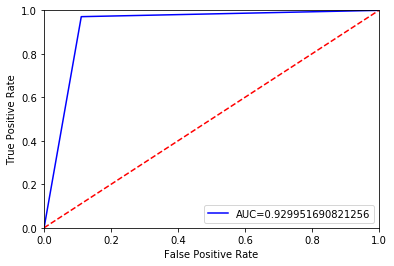

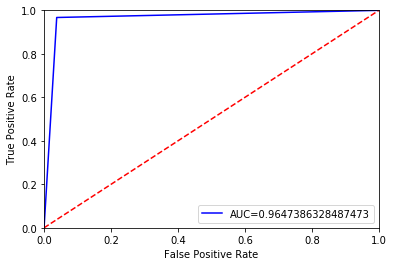

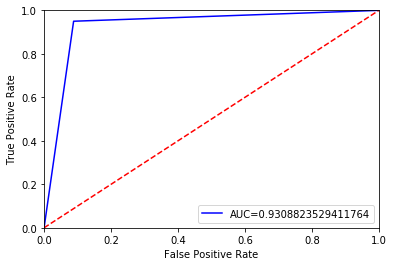

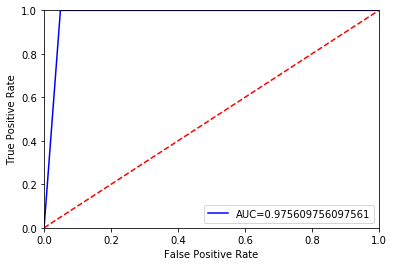

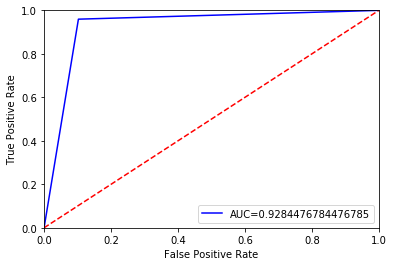

accuracy: 0.9525229001707809
precision: 0.95595879735307
recall: 0.9695374133934361
f1_score 0.9626098376330292


In [47]:
# Logistic Regression
lg_accuracy = []
lg_precision = []
lg_recall = []
lg_f1_measure = []
lg_auc = []

for train_index, test_index in kfold.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logReg = LogisticRegression()
    logReg.fit(x_train, y_train)
    y_pred_log_reg = logReg.predict(x_test)
    
    lg_accuracy.append(metrics.accuracy_score(y_test, y_pred_log_reg))
    lg_precision.append(metrics.precision_score(y_test, y_pred_log_reg))
    lg_recall.append(metrics.recall_score(y_test, y_pred_log_reg))
    lg_f1_measure.append(metrics.f1_score(y_test, y_pred_log_reg))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_log_reg)
    roc_auc = metrics.auc(fpr, tpr)
    #lg_auc.append(metrics.roc_auc_score(y_test, y_pred_log_reg))
    plt.figure();
    plt.plot(fpr, tpr, 'b', label='AUC={}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
print('accuracy: {}'.format(np.mean(lg_accuracy)))
print('precision: {}'.format(np.mean(lg_precision)))
print('recall: {}'.format(np.mean(lg_recall)))
print('f1_score {}'.format(np.mean(lg_f1_measure)))

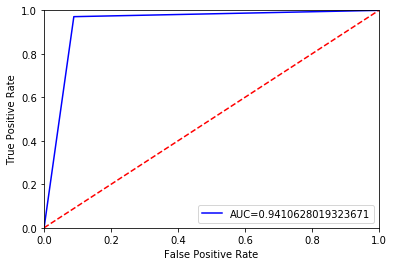

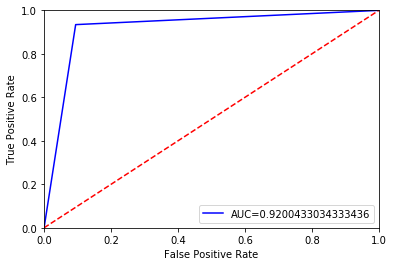

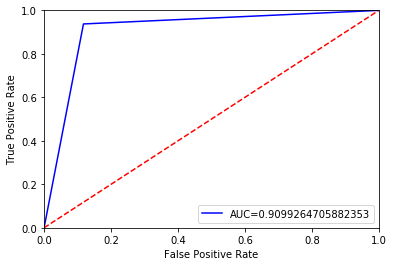

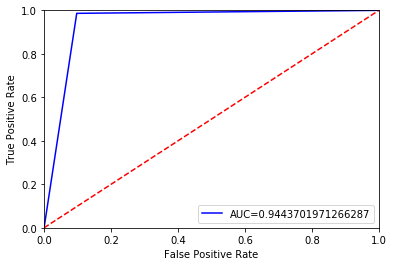

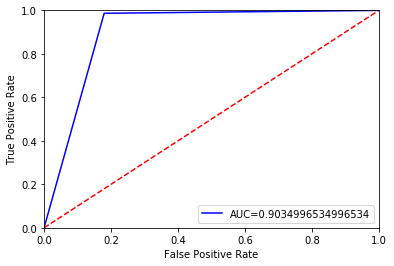

accuracy: 0.9349635149821456
precision: 0.9344504640401778
recall: 0.9631457157222639
f1_score 0.9483726505845432


In [48]:
# KNN
knn_accuracy = []
knn_precision = []
knn_recall = []
knn_f1_measure = []
knn_auc = []

for train_index, test_index in kfold.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    
    knn_accuracy.append(metrics.accuracy_score(y_test, y_pred_knn))
    knn_precision.append(metrics.precision_score(y_test, y_pred_knn))
    knn_recall.append(metrics.recall_score(y_test, y_pred_knn))
    knn_f1_measure.append(metrics.f1_score(y_test, y_pred_knn))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
    roc_auc = metrics.auc(fpr, tpr)
    #lg_auc.append(metrics.roc_auc_score(y_test, y_pred_log_reg))
    plt.figure();
    plt.plot(fpr, tpr, 'b', label='AUC={}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
print('accuracy: {}'.format(np.mean(knn_accuracy)))
print('precision: {}'.format(np.mean(knn_precision)))
print('recall: {}'.format(np.mean(knn_recall)))
print('f1_score {}'.format(np.mean(knn_f1_measure)))

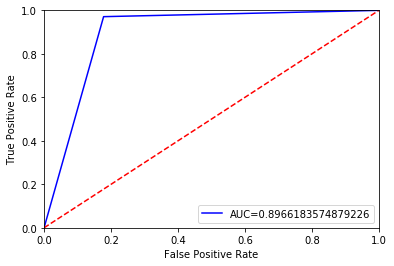

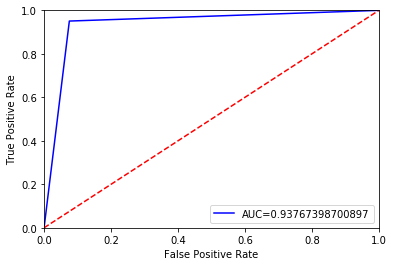

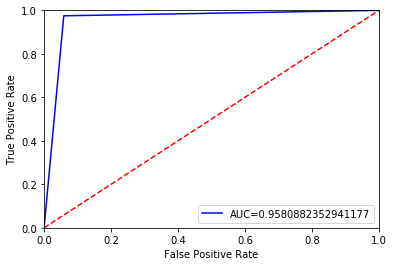

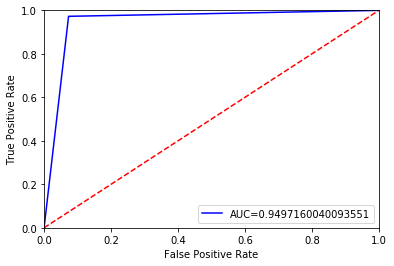

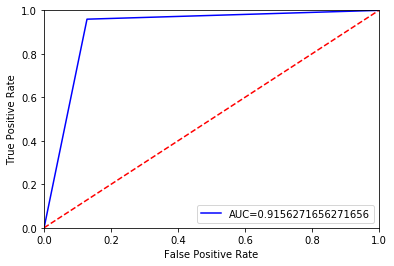

accuracy: 0.9402266728768826
precision: 0.95595879735307
recall: 0.9695374133934361
f1_score 0.9626098376330292


In [50]:
# Naive Bayes
nb_accuracy = []
nb_precision = []
nb_recall = []
nb_f1_measure = []
nb_auc = []

for train_index, test_index in kfold.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    nb = GaussianNB()
    nb.fit(x_train, y_train)
    y_pred_nb = nb.predict(x_test)
    
    nb_accuracy.append(metrics.accuracy_score(y_test, y_pred_nb))
    nb_precision.append(metrics.precision_score(y_test, y_pred_nb))
    nb_recall.append(metrics.recall_score(y_test, y_pred_nb))
    nb_f1_measure.append(metrics.f1_score(y_test, y_pred_nb))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_nb)
    roc_auc = metrics.auc(fpr, tpr)
    #lg_auc.append(metrics.roc_auc_score(y_test, y_pred_log_reg))
    plt.figure();
    plt.plot(fpr, tpr, 'b', label='AUC={}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
print('accuracy: {}'.format(np.mean(nb_accuracy)))
print('precision: {}'.format(np.mean(lg_precision)))
print('recall: {}'.format(np.mean(lg_recall)))
print('f1_score {}'.format(np.mean(lg_f1_measure)))

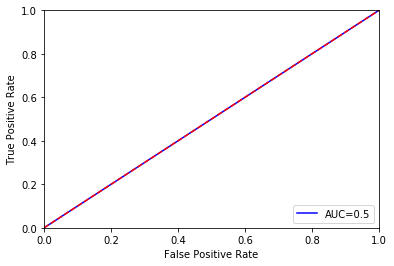

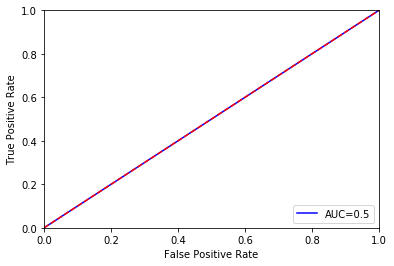

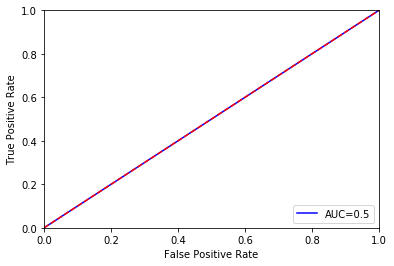

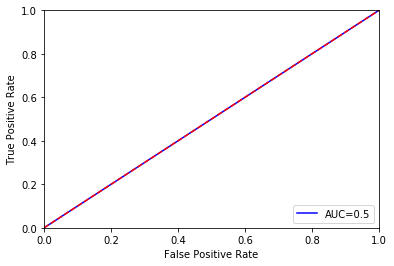

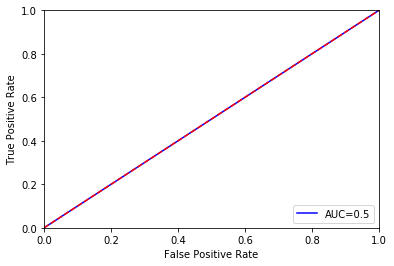

accuracy: 0.6274646793976091
precision: 0.6274646793976091
recall: 1.0
f1_score 0.7696351998417631


In [46]:
# Support Vector Machines
svm_accuracy = []
svm_precision = []
svm_recall = []
svm_f1_measure = []

for train_index, test_index in kfold.split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf = svm.SVC()
    clf.fit(x_train, y_train)
    y_pred_svm = clf.predict(x_test)
    
    svm_accuracy.append(metrics.accuracy_score(y_test, y_pred_svm))
    svm_precision.append(metrics.precision_score(y_test, y_pred_svm))
    svm_recall.append(metrics.recall_score(y_test, y_pred_svm))
    svm_f1_measure.append(metrics.f1_score(y_test, y_pred_svm))
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_svm)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure();
    plt.plot(fpr, tpr, 'b', label='AUC={}'.format(roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
print('accuracy: {}'.format(np.mean(svm_accuracy)))
print('precision: {}'.format(np.mean(svm_precision)))
print('recall: {}'.format(np.mean(svm_recall)))
print('f1_score {}'.format(np.mean(svm_f1_measure)))

In [55]:
# o melhor modelo foi o SVM
modelo_final = svm.SVC()
modelo_final.fit(X, y)
y_pred_final = modelo_final.predict(X)
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred_final))
mae = metrics.mean_absolute_error(y,y_pred_final)

print('accuracy: {}'.format(metrics.accuracy_score(y, y_pred_final)))
print('precision: {}'.format(metrics.precision_score(y, y_pred_final)))
print('recall: {}'.format(metrics.recall_score(y, y_pred_final)))
print('f1_score:{}'.format(metrics.f1_score(y, y_pred_final)))

accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score:1.0
